In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import os
os.listdir()

['.config', 'ab_data.csv', 'sample_data']

In [5]:

ab = pd.read_csv('ab_data.csv')
ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
ab.shape

(294478, 5)

In [7]:
ab['user_id'].nunique()


290584

In [8]:
ab['converted'].mean()


0.11965919355605512

In [9]:
new_1 = ab[(ab.group == 'control') & (ab.landing_page == 'new_page')]
new_1.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [10]:
new_2 = ab[(ab.group == 'treatment') & (ab.landing_page == 'old_page')]
new_2.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [11]:
new_1.count() + new_2.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [12]:
ab.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [13]:
new_1 = ab[(ab.group == 'control') & (ab.landing_page == 'old_page')]
new_2 = ab[(ab.group == 'treatment') & (ab.landing_page == 'new_page')]

In [14]:
df2 = pd.concat([new_1,new_2], keys=['control','treatment'], axis = 0)
df2.reset_index(drop=True)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
290580,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
290581,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
290582,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
290583,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [15]:
conversion_rates = ab.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)              
se_p = lambda x: stats.sem(x, ddof=0)            

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.120,0.325,0.001
treatment,0.119,0.324,0.001


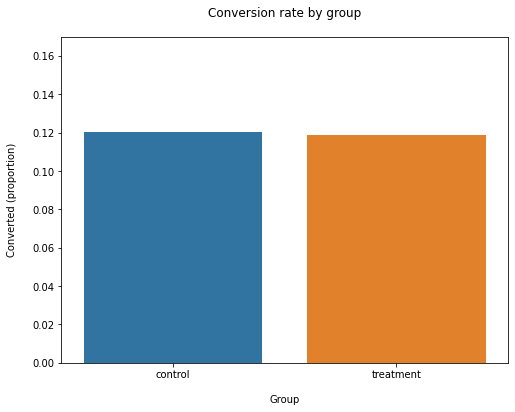

In [16]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab['group'], y=ab['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

In [17]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab[ab['group'] == 'control']['converted']
treatment_results = ab[ab['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.24
p-value: 0.216
ci 95% for control group: [0.119, 0.122]
ci 95% for treatment group: [0.117, 0.121]


In [18]:
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.13, 0.15)   

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  
required_n = ceil(required_n)                                                   

print(required_n)

4720


Second dataset example

In [ ]:
from statsmodels.stats.power import TTestIndPower

In [ ]:
effect = 0.1
alpha = 0.06
power = 0.9

# perform power analysis 
analysis = TTestIndPower()
result = analysis.solve_power(effect, power = power,nobs1= None, ratio = 1.0, alpha = alpha)
print('Sample Size: %.3f' % round(result))

Sample Size: 2001.000


In [ ]:
user_id_control = list(range(1,1501))
user_id_treatment = list(range(1501,3350))

In [ ]:
import numpy as np
control_status = ['control']*1500
treatment_status = ['treatment']*1849   

In [ ]:
μ_1 = 30

σ_squared_1 = 10

np.random.seed(123)

minutes_control = np.random.normal(loc = μ_1, scale = σ_squared_1, size = 1500)

In [ ]:
μ_2 = 31

σ_squared_2 = 10

np.random.seed(123)

minutes_treat = np.random.normal(loc = μ_2, scale = σ_squared_2, size = 1849)

In [ ]:
Active_status = [True,False]

# control  
day_1_control = np.random.choice(Active_status, 1500, p=[0.3,0.7])

# treatment
day_1_treatment = np.random.choice(Active_status, 1849, p=[0.35,0.65])

In [ ]:
Active_status = [True,False]

# control  
day_7_control = np.random.choice(Active_status, 1500, p=[0.35,0.65])

# treatment
day_7_treatment = np.random.choice(Active_status, 1849, p=[0.25,0.75])

In [ ]:
import pandas as pd
raw_control = {'user_id':user_id_control,
                 'version':control_status,
               'minutes_play':minutes_control,
               'day_1_active':day_1_control,
               'day_7_active':day_1_control
                }

control_group = pd.DataFrame(data = raw_control)
control_group

,user_id,version,minutes_play,day_1_active,day_7_active
0,1,control,19.143694,True,True
1,2,control,39.973454,True,True
2,3,control,32.829785,True,True
3,4,control,14.937053,False,False
4,5,control,24.213997,False,False
...,...,...,...,...,...
1495,1496,control,32.158017,True,True
1496,1497,control,15.602643,False,False
1497,1498,control,29.579927,False,False
1498,1499,control,34.860664,False,False


In [ ]:
raw_treatment = {'user_id':user_id_treatment,
                 'version':treatment_status,
               'minutes_play':minutes_treat,
               'day_1_active':day_1_treatment,
               'day_7_active':day_7_treatment
                }

treatment_group = pd.DataFrame(data = raw_treatment)
treatment_group

,user_id,version,minutes_play,day_1_active,day_7_active
0,1501,treatment,20.143694,True,True
1,1502,treatment,40.973454,False,False
2,1503,treatment,33.829785,True,False
3,1504,treatment,15.937053,True,False
4,1505,treatment,25.213997,False,False
...,...,...,...,...,...
1844,3345,treatment,16.428999,True,False
1845,3346,treatment,44.834913,False,False
1846,3347,treatment,30.616217,True,False
1847,3348,treatment,25.022094,False,True


In [ ]:
two_datasets = control_group.append(treatment_group)


In [ ]:
final_data = two_datasets.sample(frac=1)

In [ ]:
final_data.head()


,user_id,version,minutes_play,day_1_active,day_7_active
1591,3092,treatment,27.733483,True,False
530,2031,treatment,35.657701,True,True
1190,1191,control,21.460552,True,True
1151,1152,control,55.558945,True,True
488,1989,treatment,53.506760,False,False


In [ ]:
final_data.groupby('version')['user_id'].count()

version
control      1500
treatment    1849
Name: user_id, dtype: int64

In [ ]:
from scipy.stats import chisquare 
chisquare([1500,1849],f_exp = [1675,1675])

Power_divergenceResult(statistic=36.358805970149255, pvalue=1.6413593359852185e-09)

Text(0, 0.5, 'User Count')

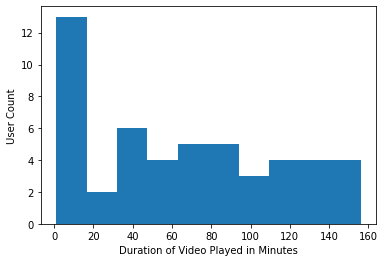

In [ ]:
%matplotlib inline

final_data['minutes_play_integers'] = round(final_data['minutes_play'])
plot_df = final_data.groupby('minutes_play_integers')['user_id'].count()

# Plot the distribution of players that played 0 to 50 minutes
ax = plot_df.head(n=50).plot(x="minutes_play_integers", y="user_id", kind="hist")
ax.set_xlabel("Duration of Video Played in Minutes")
ax.set_ylabel("User Count")

In [ ]:
final_data['day_1_active'].mean()

0.32248432367871005

In [ ]:
final_data.groupby('version')['day_1_active'].mean()

version
control      0.291333
treatment    0.347756
Name: day_1_active, dtype: float64

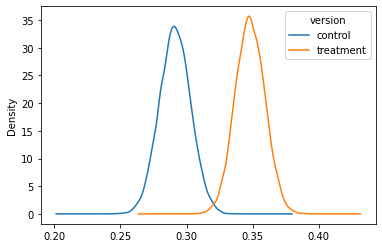

In [ ]:
boot_means = []

# run the simulation for 10k times 
for i in range(10000):
    #frac=1 means randomize the order of all rows 
    boot_sample = final_data.sample(frac=1,replace=True).groupby('version')['day_1_active'].mean()
    boot_means.append(boot_sample)

# a Pandas DataFrame
boot_means = pd.DataFrame(boot_means)

# kernel density estimate
boot_means.plot(kind = 'kde')

In [ ]:
boot_means['diff'] = (boot_means['treatment'] - boot_means['control'])/boot_means['control']*100

In [ ]:
boot_means['diff']

day_1_active    20.314815
day_1_active    12.225421
day_1_active    29.008493
day_1_active    28.122686
day_1_active     7.469436
                  ...    
day_1_active    21.117308
day_1_active    17.971147
day_1_active    20.627555
day_1_active    21.911091
day_1_active    19.021256
Name: diff, Length: 10000, dtype: float64

Text(0.5, 0, '% diff in means')

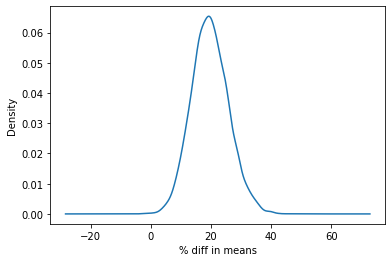

In [ ]:
ax = boot_means['diff'].plot(kind = 'kde')
ax.set_xlabel("% diff in means")

In [ ]:
boot_means[boot_means['diff'] > 0]

version,control,treatment,diff
day_1_active,0.297422,0.357843,20.314815
day_1_active,0.303523,0.340630,12.225421
day_1_active,0.273206,0.352459,29.008493
day_1_active,0.277778,0.355896,28.122686
day_1_active,0.294157,0.316129,7.469436
...,...,...,...
day_1_active,0.272786,0.330392,21.117308
day_1_active,0.291530,0.343921,17.971147
day_1_active,0.283083,0.341476,20.627555
day_1_active,0.283820,0.346008,21.911091


In [ ]:
p = (boot_means['diff'] >0).sum()/len(boot_means)
p

0.9994

In [ ]:
boot_7d = []

for i in range(10000):
    #set frac=1 --> sample all rows
    boot_mean = final_data.sample(frac=1,replace=True).groupby('version')['day_7_active'].mean() 
    boot_7d.append(boot_mean)
    
boot_7d = pd.DataFrame(boot_7d)

boot_7d['diff'] = (boot_7d['treatment'] - boot_7d['control'])/boot_7d['control'] *100

Text(0.5, 0, '% diff in means')

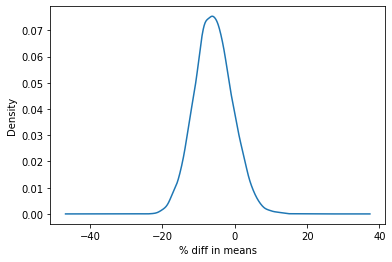

In [ ]:
ax = boot_7d['diff'].plot(kind = 'kde')
ax.set_xlabel("% diff in means")

In [ ]:
p = (boot_7d['diff']>0).sum()/len(boot_7d)

1-p

0.8687